# Visualization and Simple Regression models

In this notebook, we will visualize the Pantheon+ Type Ia supernova data to determine options to employ Regression to predict the absolute magnitude of a type Ia supernova given the redshift (and some other features if possible).

We will begin by plotting the absolute magnitude ($m_B$) against redshift ($z$).

d:\Random\Machine Learning Stuff\Projects\pantheonplus-regression\notebooks\../src/notebooks_src\preprocessing.py:11: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(path1, sep = '\s+')


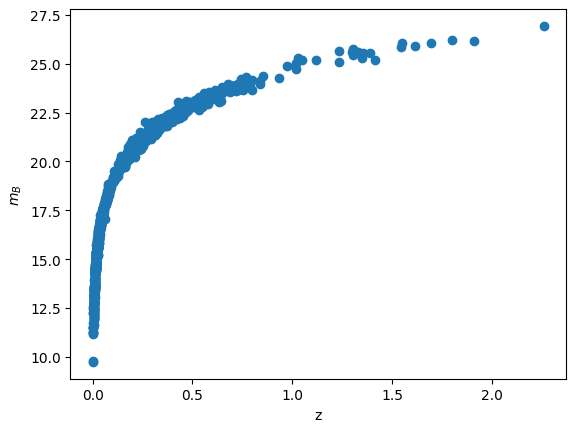

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src/notebooks_src')
from preprocessing import preprocess_pantheonp

pantheonpluspath = '../data/Pantheon+SH0ES.dat'

X1,Y1 = preprocess_pantheonp(pantheonpluspath)
x1 = X1['zHD']
y1 = Y1.values
plt.scatter(x1,y1)
plt.xlabel('z')
plt.ylabel('$m_B$')
plt.show()


### Ideas
We can see that the apparent magnitude varies logarithmically with redshift. There are two options we could explore : 
1. Use a linear regressor with a transformation to redshift (as the logarithm of z).
2. Use a polynomial regressor

We will start with the linear regression.

## Simple Linear Regression


We will start by importing necessary functions, data and also transforming the redshift.

In [2]:
from regressors import linearregressor, multi_linear
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error as rmse
x2 = np.log10(X1['zHD'].values.reshape(-1,1))
y2 = Y1.values.reshape(-1,1)

Now we can run the regressor.

Mean Absolute Error (MAE) for linear regressor : 0.14625544731847107
Root Mean Squared Error (RMSE) for linear regressor : 0.20103757764236563


Text(0.5, 1.0, 'Linear Regression with single feature')

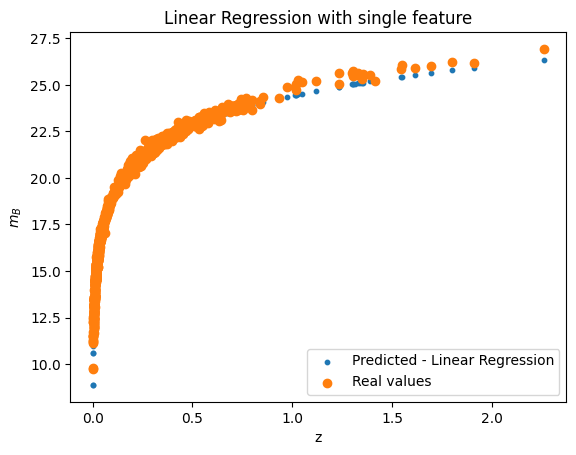

In [3]:
params,biasterm = linearregressor(x2,y2,100000)

yvals = biasterm.dot(params)
print(f'Mean Absolute Error (MAE) for linear regressor : {mean_absolute_error(y2,yvals)}')
print(f'Root Mean Squared Error (RMSE) for linear regressor : {rmse(y2,yvals)}')
plt.scatter(x1,yvals, label = 'Predicted - Linear Regression', s = 10)
plt.scatter(x1,y2, label = 'Real values')
plt.xlabel('z')
plt.ylabel('$m_B$')
plt.legend()
plt.title('Linear Regression with single feature')

We have already obtained a really good fit from just the linear regressor. Now we can try adding multiple features to the regressor, without any transformation to the new features.

MAE for multiple linear regression : 0.14624735901177063
RMSE for multiple linear regression : 0.20088526509740812


Text(0.5, 1.0, 'Linear Regression with multiple features')

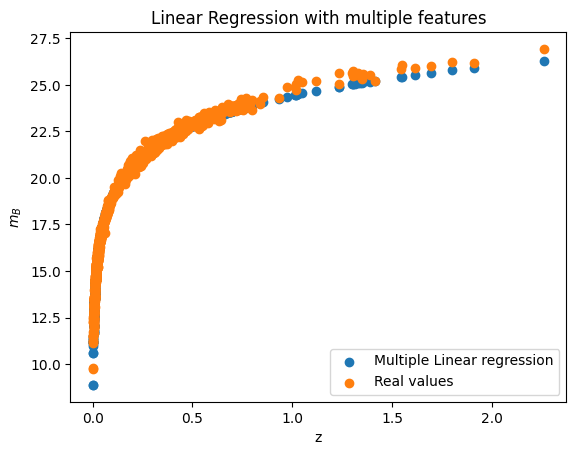

In [4]:
xtemp = X1[['x1','c']]
x3 = np.c_[x2,xtemp]
params1,biasterm1 = multi_linear(x3,y2,100000)
yvals2 = biasterm1.dot(params1)
print(f'MAE for multiple linear regression : {mean_absolute_error(y2,yvals2)}')
print(f'RMSE for multiple linear regression : {rmse(y2,yvals2)}')
plt.scatter(x1,yvals2, label = 'Multiple Linear regression')
plt.scatter(x1,y1, label = 'Real values')
plt.legend()
plt.xlabel('z')
plt.ylabel('$m_B$')
plt.title('Linear Regression with multiple features')


Adding multiple features does not seem to have benefitted the fit that much. We will now try a simple polynomial regressor.

## Simple Polynomial Regressor

We can try fitting the data to a polynomial regressor. We use a 5th degree polynomial to fit the data. I have not done the logarithmic transformation to redshift here.

MAE for a simple polynomial regressor : 0.6653910994955293
RMSE for a simple polynomial regressor : 0.9044237591830394


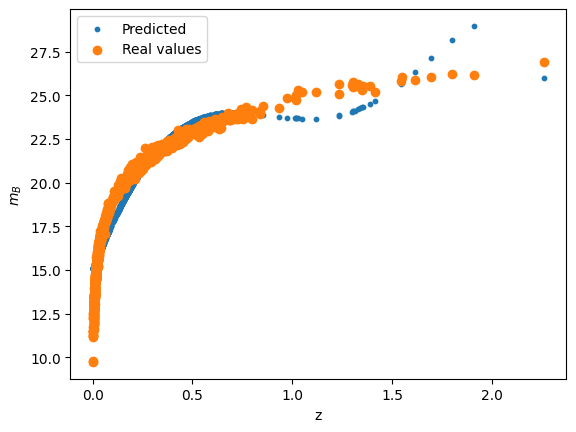

In [5]:
from regressors import poly_regressor
x4 = X1['zHD'].values.reshape(-1,1)
# y1 = y1.reshape(-1,1)
params2, biasterm2 = poly_regressor(x4,y2,10000, learnrate = 0.3,degree = 5)
yvals2 = biasterm2.dot(params2)

plt.scatter(x1,yvals2, label = 'Predicted', s = 10)
plt.scatter(x1,y1, label = 'Real values')
plt.xlabel('z')
plt.ylabel('$m_B$')
plt.legend()
print(f'MAE for a simple polynomial regressor : {mean_absolute_error(y1,yvals2)}')
print(f'RMSE for a simple polynomial regressor : {rmse(y1,yvals2)}')


Even though the fit is better this time, it still doesn't capture the complete features of the curve.

We will use more standard regressors like those provided by scikit-learn for this project, to get better predictions and to be able to use more features.

## Conclusion

Even though the MAE of these models are small, the plots show that the models heaven't 'learnt' the proper variation of $m_B$ from the data and will give wrong predictions for higher redshifts. Using better models with more features could improve the predictions of the model.